In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# configure logging
logging.basicConfig(level = logging.INFO, format = "%(asctime)s - %(levelname)s - %(message)s")

In [3]:
def load_data():
    """Load the Iris Dataset."""
    try:
        iris = load_iris()
        X,y = iris.data, iris.target
        logging.info("Dataset laoded Successfully.")
        return X, y , iris.feature_names, iris.target_names
    except Exception as e:
        logging.error(f"Error loading dataset: {e}")
        return None, None, None, None

In [4]:
def split_data(X , y, test_size = 0.2, random_state = 42):
    """Split data into training and test sets."""
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=random_state)
        logging.info(f"Data split: {len(X_train)} training samples, {len(X_test)} test samples.")
        return X_train, X_test, y_train, y_test
    except Exception as e:
        logging.error(f"Error splitting data: {e}")
        return None, None, None, None

In [5]:
def train_decision_tree(X_train, y_train, criterion="gini", max_depth=3, random_state=42):
    """Train a Decision Tree model."""
    try:
        dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)
        dt.fit(X_train, y_train)
        logging.info(f"Decision Tree trained with max_depth={max_depth}, criterion={criterion}.")
        return dt
    except Exception as e:
        logging.error(f"Error training model: {e}")
        return None

In [20]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print accuracy, confusion matrix, and classification report."""
    try:
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        logging.info(f"Model Accuracy: {acc:.2f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris_target_names, yticklabels=iris_target_names)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()

        # Classification Report
        print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris_target_names))
    except Exception as e:
        logging.error(f"Error evaluating model: {e}")

In [21]:
def visualize_tree(model, feature_names, target_names):
    """Visualize the trained decision tree."""
    try:
        plt.figure(figsize=(12, 8))
        plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()
    except Exception as e:
        logging.error(f"Error visualizing tree: {e}")


2025-02-13 17:32:57,076 - INFO - Dataset laoded Successfully.
2025-02-13 17:32:57,080 - INFO - Data split: 120 training samples, 30 test samples.
2025-02-13 17:32:57,083 - INFO - Decision Tree trained with max_depth=3, criterion=gini.
2025-02-13 17:32:57,085 - INFO - Model Accuracy: 1.00


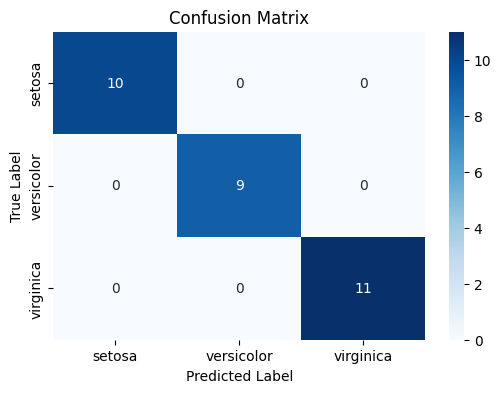


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



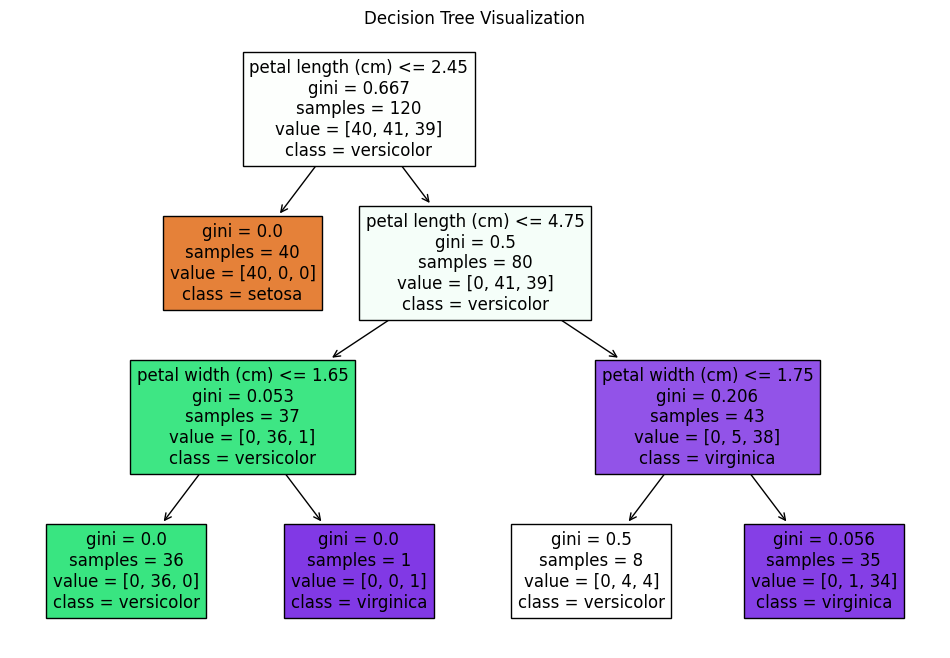

In [22]:
# Main execution
if __name__ == "__main__":
    X,y,iris_features_names, iris_target_names = load_data()
    if X is not None and y is not None:
        X_train, X_test, y_train, y_test = split_data(X,y)
        model = train_decision_tree(X_train, y_train, max_depth = 3)
        if model:
            evaluate_model(model, X_test, y_test)
            visualize_tree(model, iris_features_names, iris_target_names)

#### Key Improvements:
✅ Encapsulation in Functions  
Each part is in a separate function, making it reusable and modular. 

✅ Logging  
Added logging.info() and logging.error() to track execution and catch errors. 

✅ Error Handling  
try-except blocks to prevent crashes if an error occurs. 

✅ Confusion Matrix  
Used Seaborn heatmap for better visualization. 

✅ Classification Report  
Shows precision, recall, and F1-score for each class. 

✅ Hyperparameter Flexibility  
Easy to change criterion (Gini or Entropy) and max_depth. 